In [1]:
from visual_score import *
from pathlib import Path


def sum_of_area(blocks):
    sum = 0
    for block in blocks:
        sum += block['bbox'][2] * block['bbox'][3]
    return sum
    
def visual_eval(gpt_img, original_img, print_all=False, ocr_free=True, debug=False):
    """
    gpt_img: file to image rendered by gpt gen code. Please place the html file with the same name in the same folder.
    original_img: file to image rendered by the original code. Please place the html file with the same name in the same folder.
    print_all: print matched information or not. Default to False.
    ocr_free: using ocr free approach or not. Default to True.
    """

    if ocr_free:
        gpt_html = gpt_img.replace(".png", ".html")
        original_html = original_img.replace(".png", ".html")
        os.system(f"python3 screenshot_single.py --html {gpt_html} --png {gpt_img}")
        os.system(f"python3 screenshot_single.py --html {original_html} --png {original_img}")

        blocks1 = get_blocks_ocr_free(gpt_img)
        blocks2 = get_blocks_ocr_free(original_img)
        consecutive_bonus, window_size = 0.1, 1
    else:
        blocks1 = get_ocr_blocks(gpt_img)
        blocks2 = get_ocr_blocks(original_img)
        consecutive_bonus, window_size = 0.25, 2

        blocks1 = merge_blocks(blocks1)
        blocks2 = merge_blocks(blocks2)

    blocks1_area = sum_of_area(blocks1)
    blocks2_area = sum_of_area(blocks2)
    max_blocks_area = max(blocks1_area, blocks2_area)

    matching = find_maximum_matching(blocks1, blocks2, consecutive_bonus, window_size)
    matched_list = []
    scores = []

    for i, j in matching:
        if debug:
            # print(f"{blocks1[i]} matched with {blocks2[j]}")
            # print(SequenceMatcher(None, blocks1[i]['text'], blocks2[j]['text']).ratio())
            pass

        min_block_area = min(blocks1[i]['bbox'][2] * blocks1[i]['bbox'][3], blocks2[j]['bbox'][2] * blocks2[j]['bbox'][3])
        text_similarity = SequenceMatcher(None, blocks1[i]['text'], blocks2[j]['text']).ratio()
        position_similarity = 1 - calculate_distance(blocks1[i]['bbox'][0] + blocks1[i]['bbox'][2] / 2, \
                                                blocks1[i]['bbox'][1] + blocks1[i]['bbox'][3] / 2, \
                                                blocks2[j]['bbox'][0] + blocks2[j]['bbox'][2] / 2, \
                                                blocks2[j]['bbox'][1] + blocks2[j]['bbox'][3] / 2) / np.sqrt(2)
        matched_list.append([blocks1[i]['bbox'], blocks2[j]['bbox']])

        # validation check
        if min(blocks1[i]['bbox'][2], blocks2[j]['bbox'][2], blocks1[i]['bbox'][3], blocks2[j]['bbox'][3]) == 0:
            print(f"{blocks1[i]} matched with {blocks2[j]}")
        assert calculate_ratio(blocks1[i]['bbox'][2], blocks2[j]['bbox'][2]) > 0 and calculate_ratio(blocks1[i]['bbox'][3], blocks2[j]['bbox'][3]) > 0, f"{blocks1[i]} matched with {blocks2[j]}"

        scores.append(min_block_area * text_similarity * position_similarity / max_blocks_area)
    
    if print_all:
        print(f"Matched: {len(location_score)}")
        print("Score:")
        print_stat(scores)

    if debug:
        img1 = cv2.imread(gpt_img)
        img2 = cv2.imread(original_img)
        img1_with_boxes, img2_with_boxes = draw_matched_bboxes(img1, img2, matched_list)
    
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(img1_with_boxes)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(img2_with_boxes)
        plt.axis('off')
        plt.show()

    if len(scores) > 0:
        matched = len(scores)
        final_score = np.sum(scores)
        return matched, final_score
    else:
        return 0.0, 0.0

  0%|                                                                                                                                                                              | 0/12 [00:00<?, ?it/s]

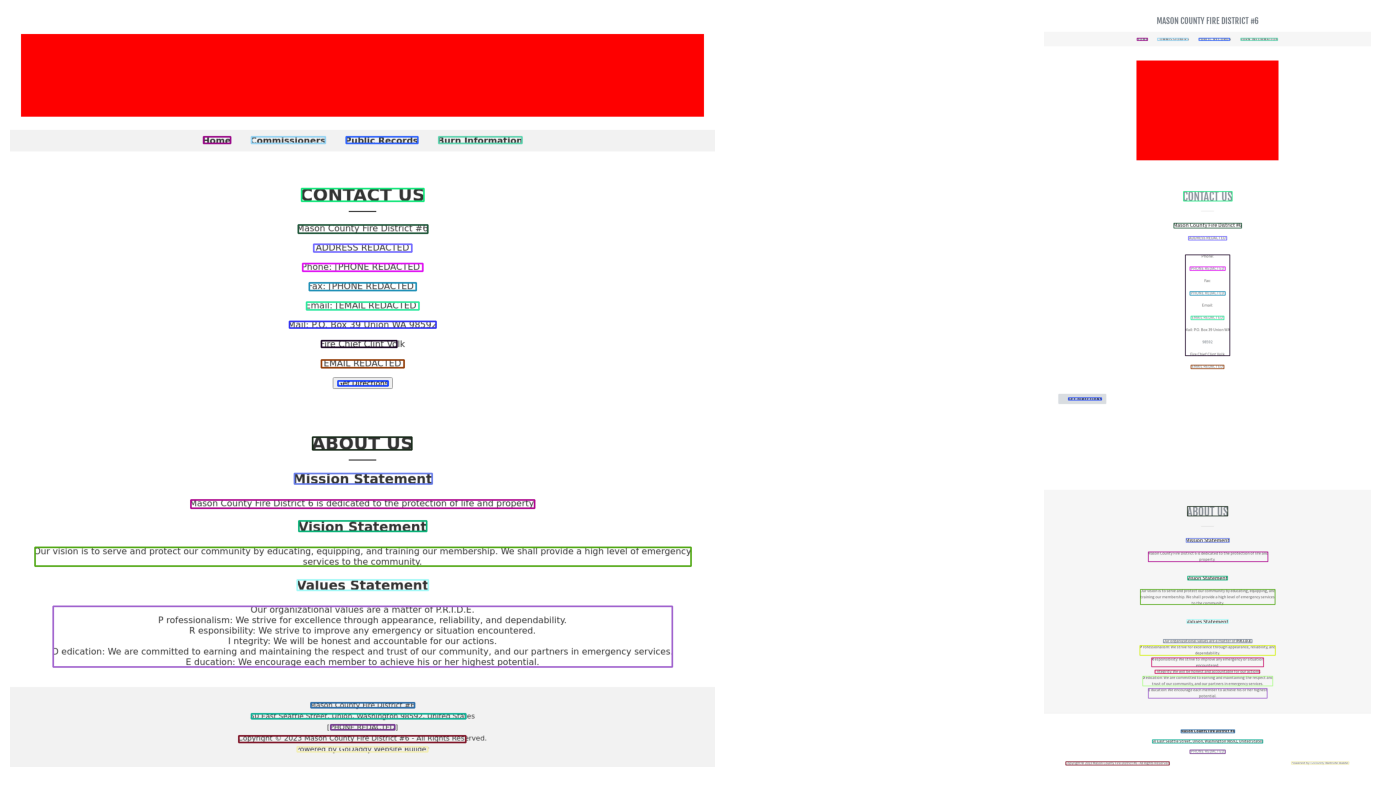

  8%|█████████████▊                                                                                                                                                        | 1/12 [00:11<02:02, 11.17s/it]

9412.html 31 0.0986693339341358


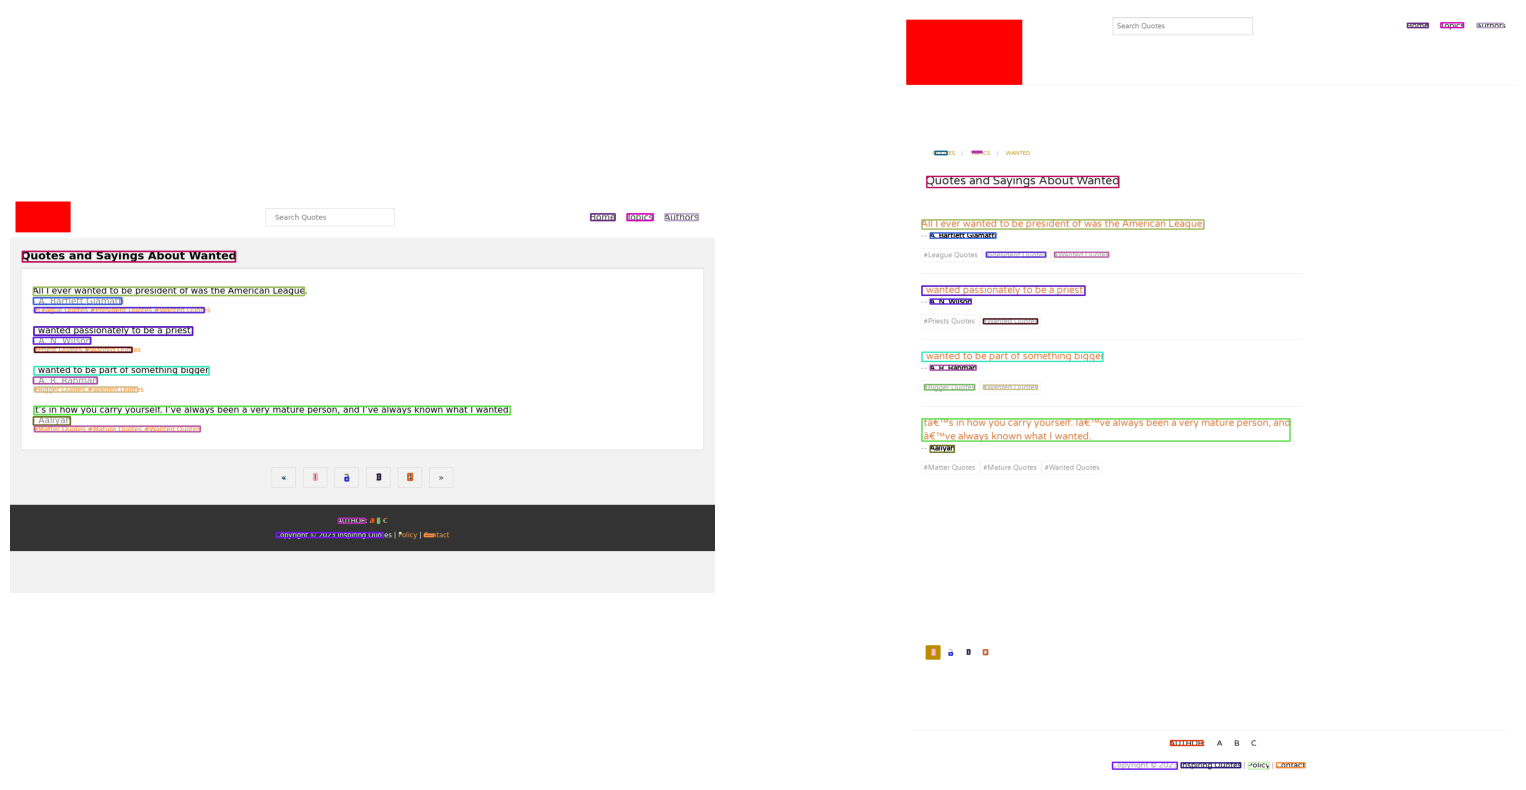

 17%|███████████████████████████▋                                                                                                                                          | 2/12 [00:19<01:32,  9.24s/it]

13692.html 29 0.5415249287449747


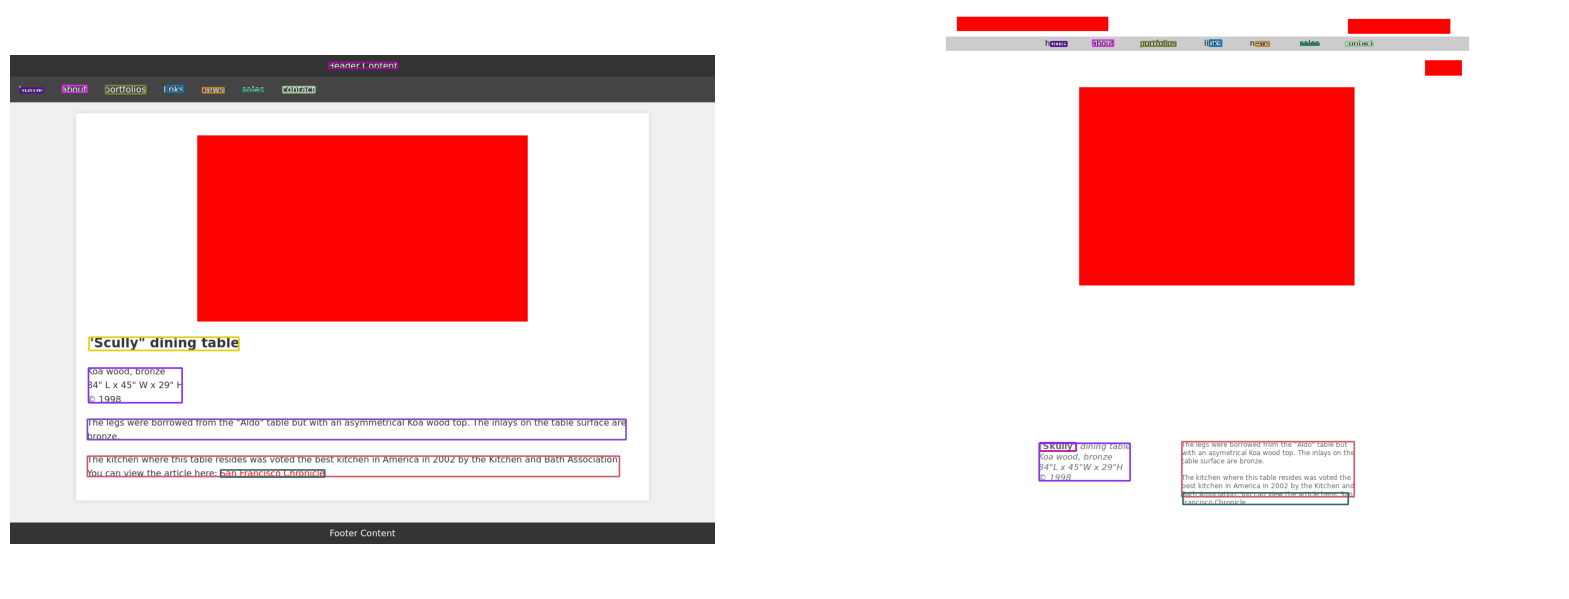

 25%|█████████████████████████████████████████▌                                                                                                                            | 3/12 [00:25<01:13,  8.18s/it]

2.html 15 0.6746377322849533


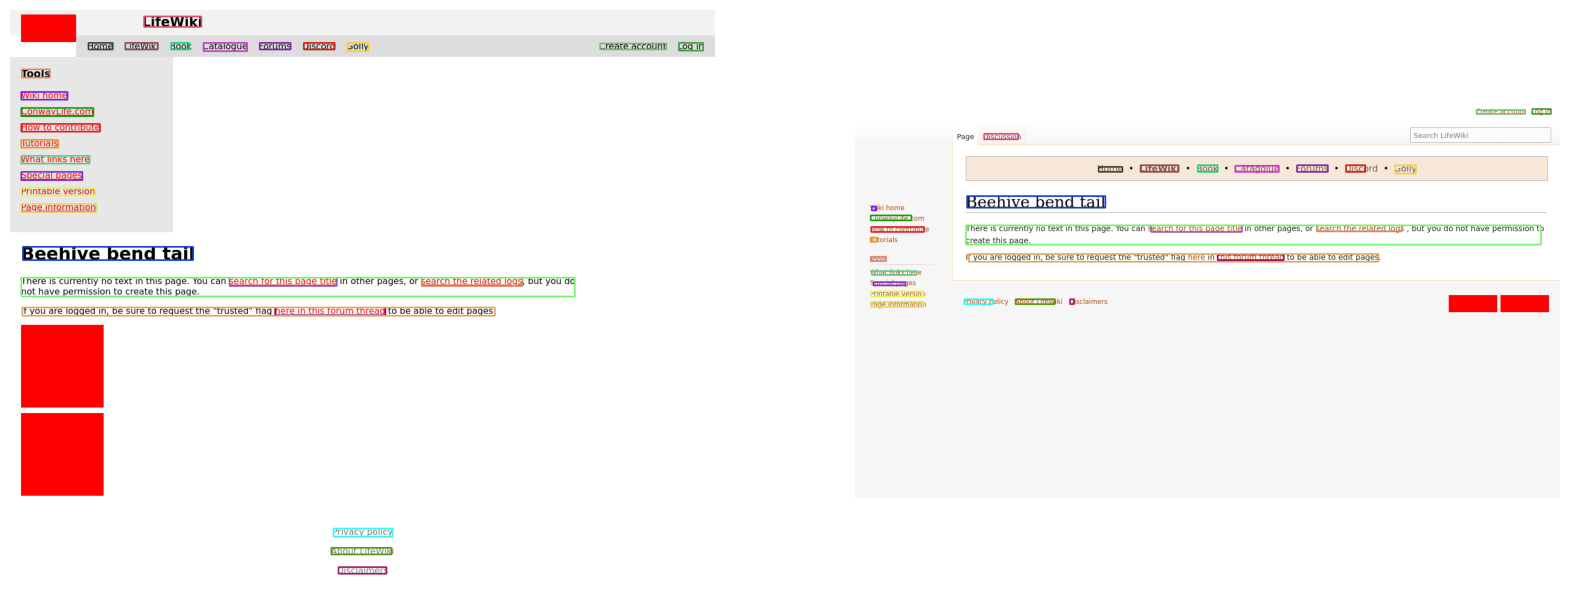

 33%|███████████████████████████████████████████████████████▎                                                                                                              | 4/12 [00:33<01:02,  7.85s/it]

10612.html 31 0.5338513001687264


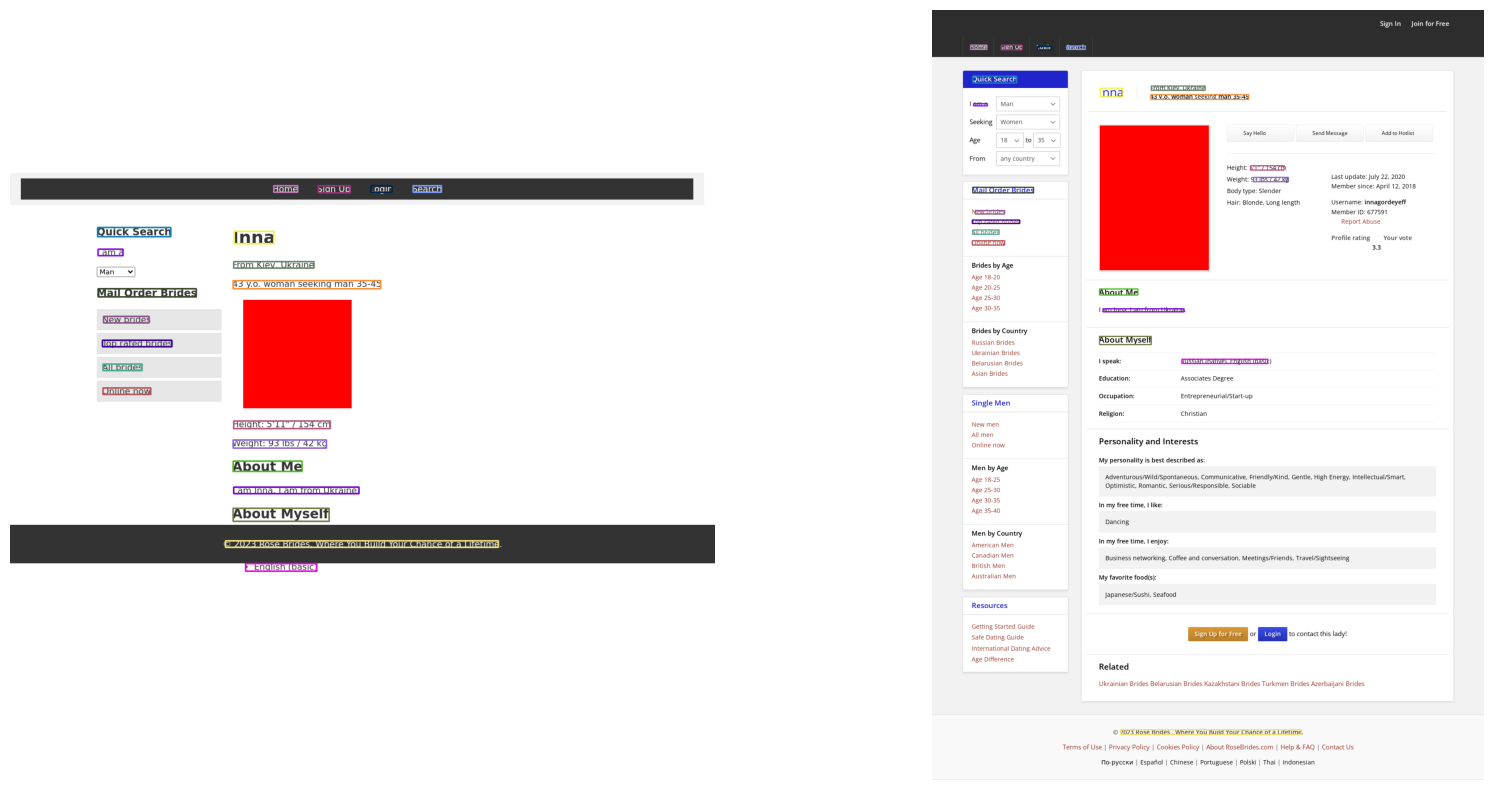

 42%|█████████████████████████████████████████████████████████████████████▏                                                                                                | 5/12 [00:47<01:10, 10.11s/it]

17642.html 21 0.08539534504848384


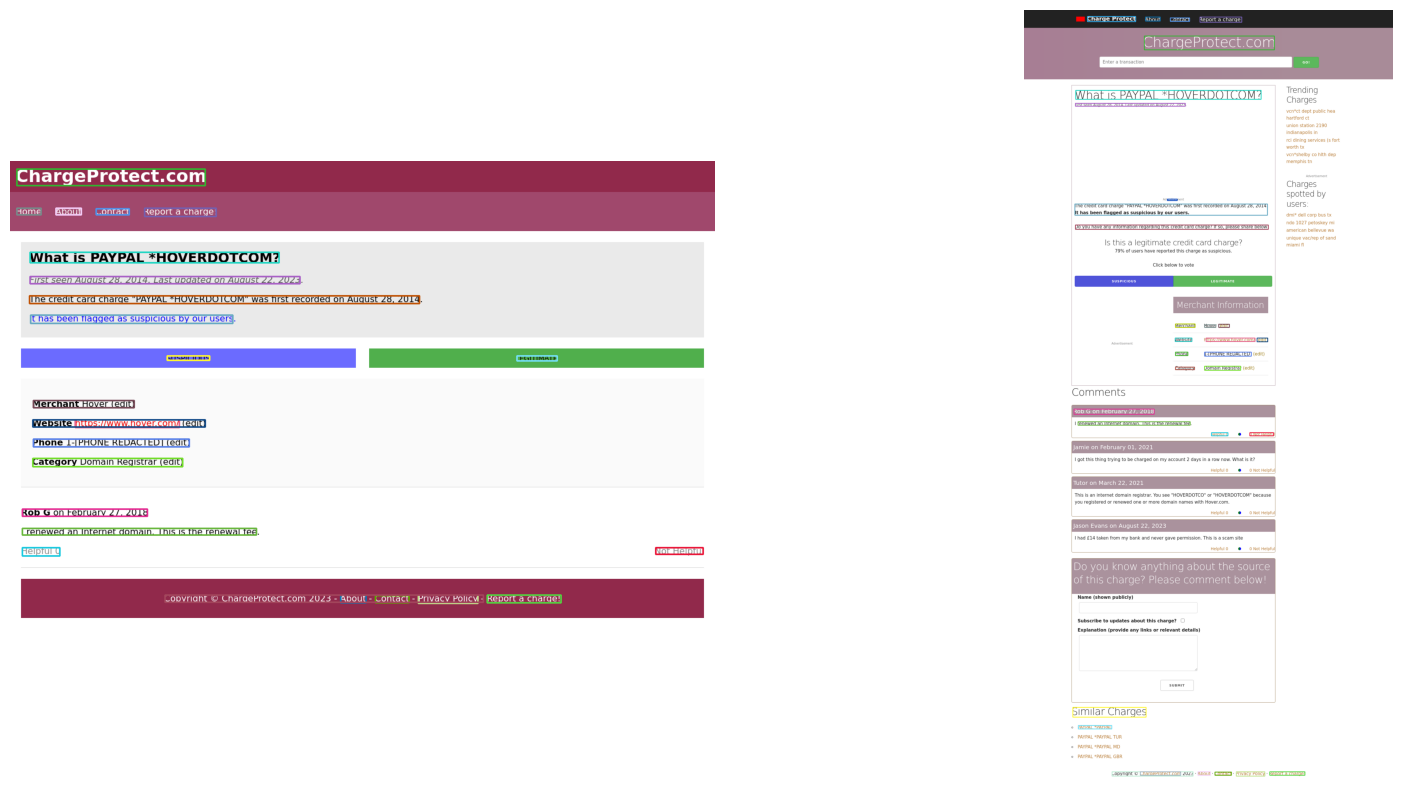

 50%|███████████████████████████████████████████████████████████████████████████████████                                                                                   | 6/12 [00:58<01:02, 10.42s/it]

112.html 33 0.24911376585278003


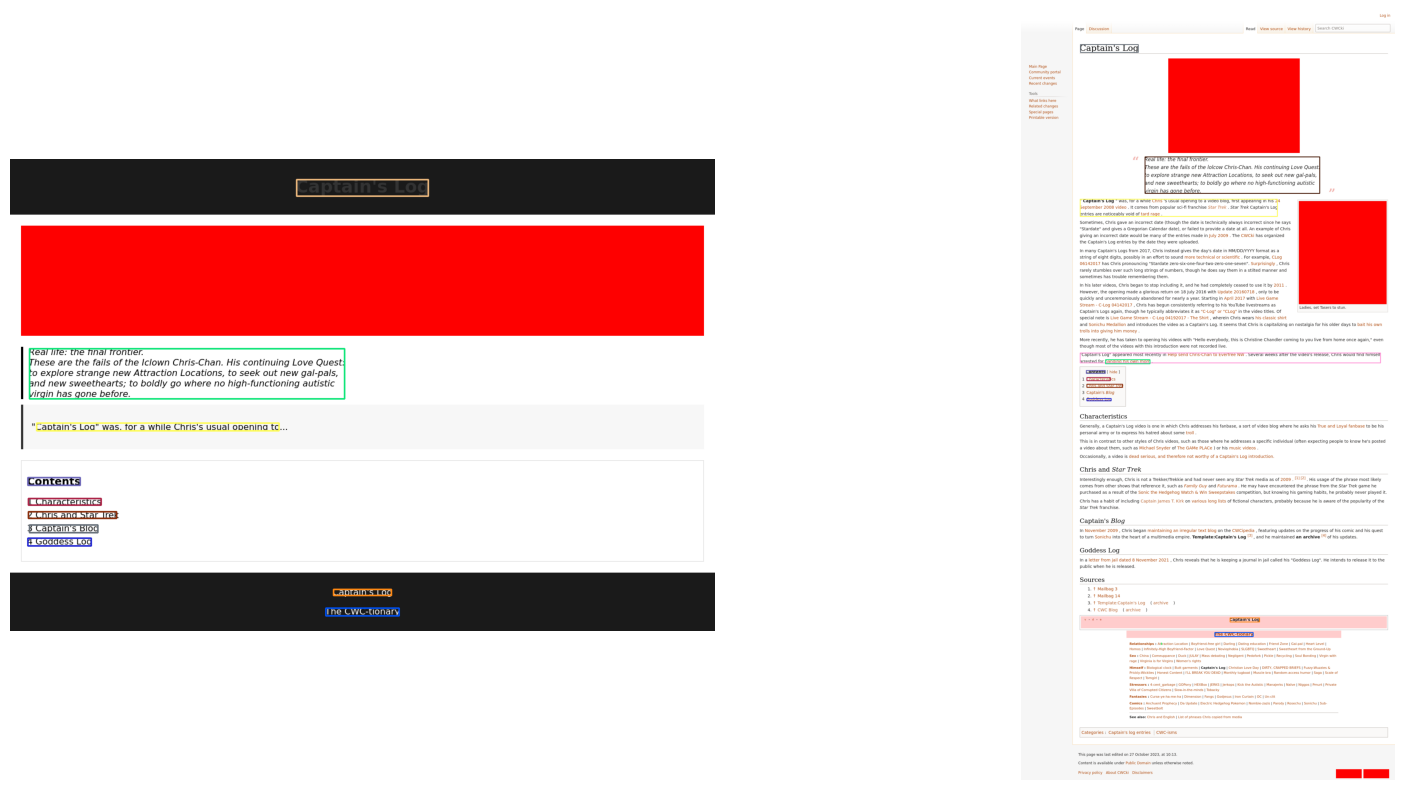

 58%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 7/12 [01:19<01:10, 14.04s/it]

102.html 14 0.029225095741378056


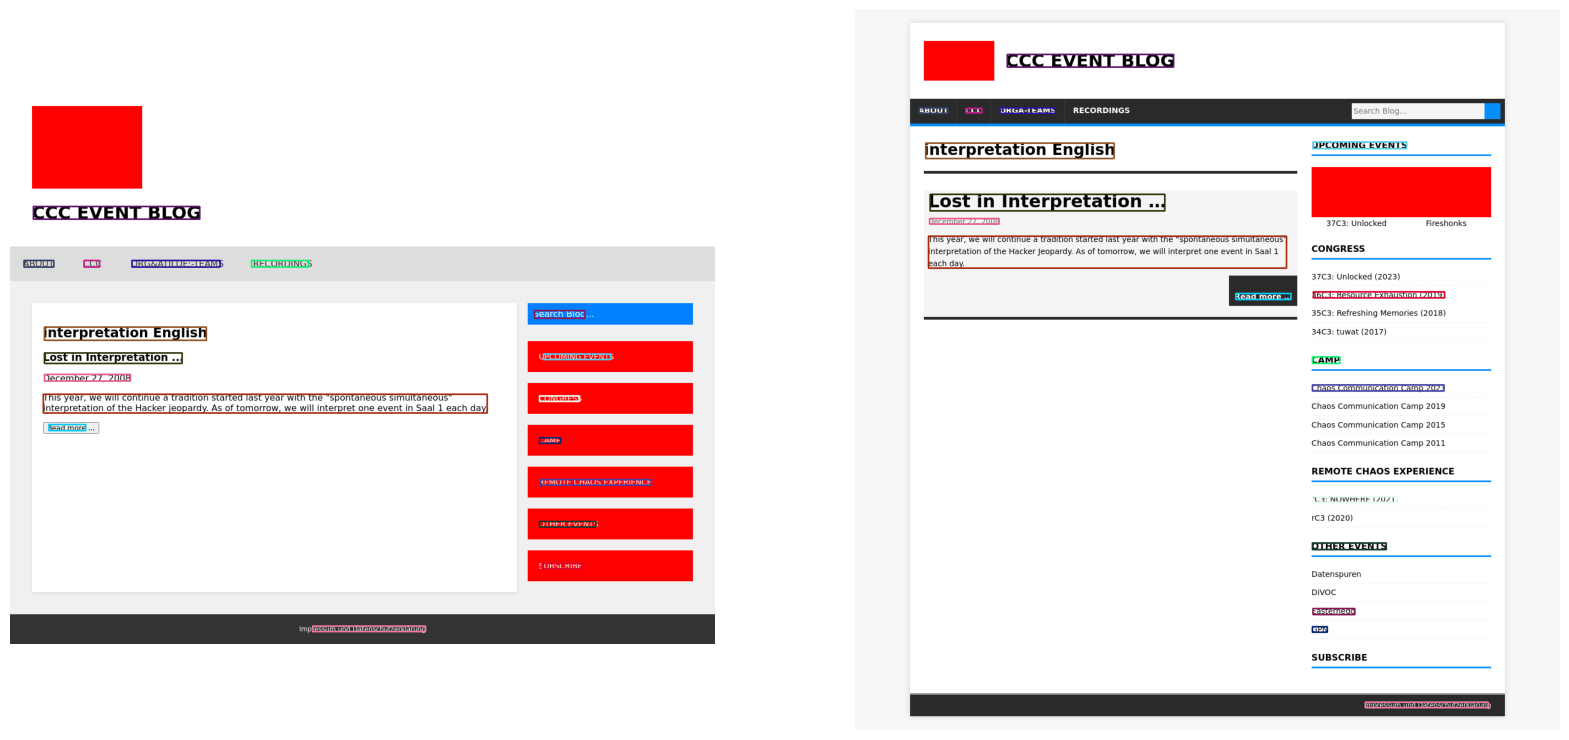

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 8/12 [01:27<00:48, 12.09s/it]

10582.html 18 0.4582905989807017


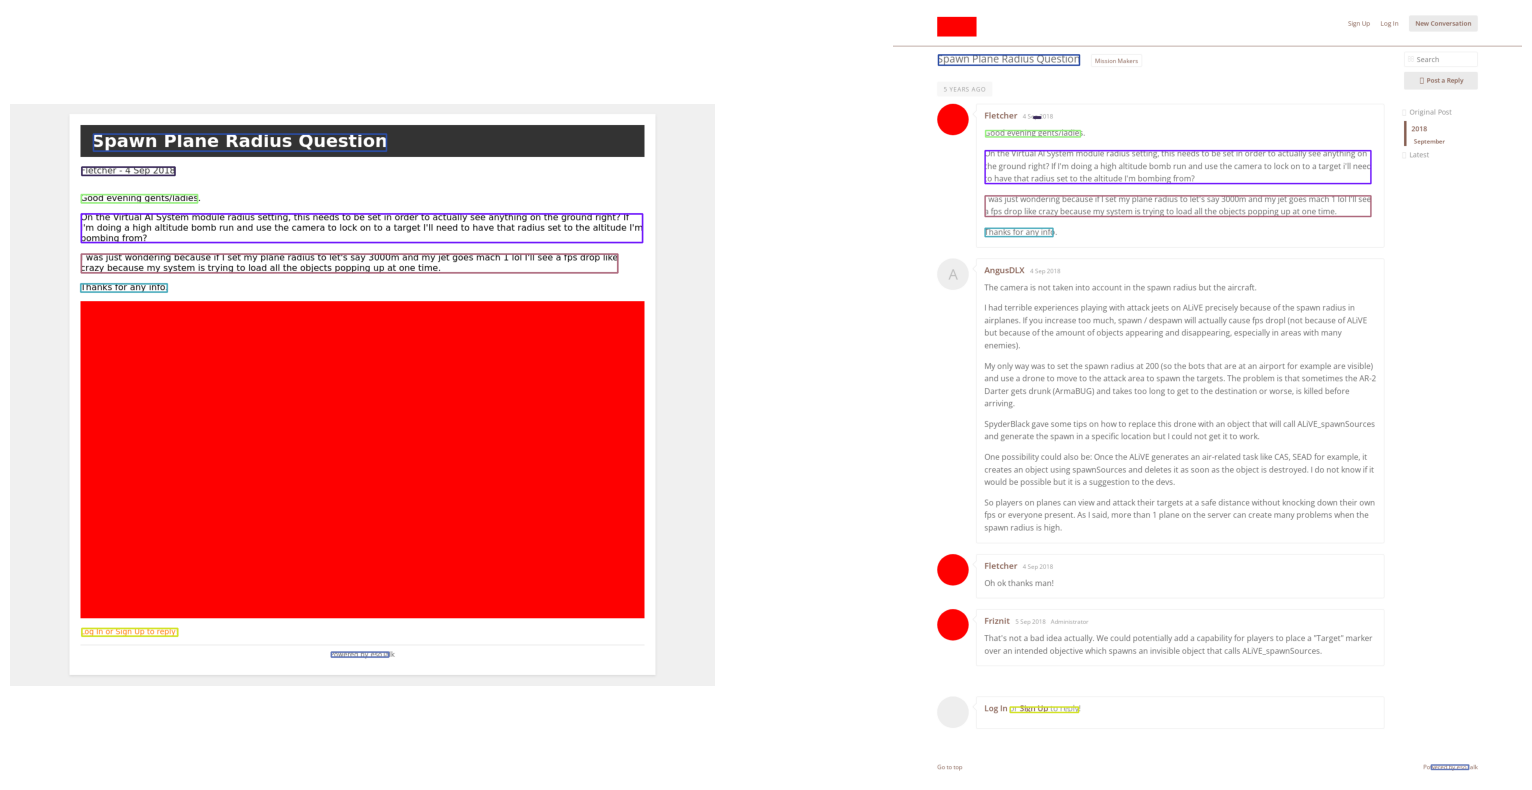

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 9/12 [01:36<00:32, 10.86s/it]

8512.html 8 0.21551868321418788


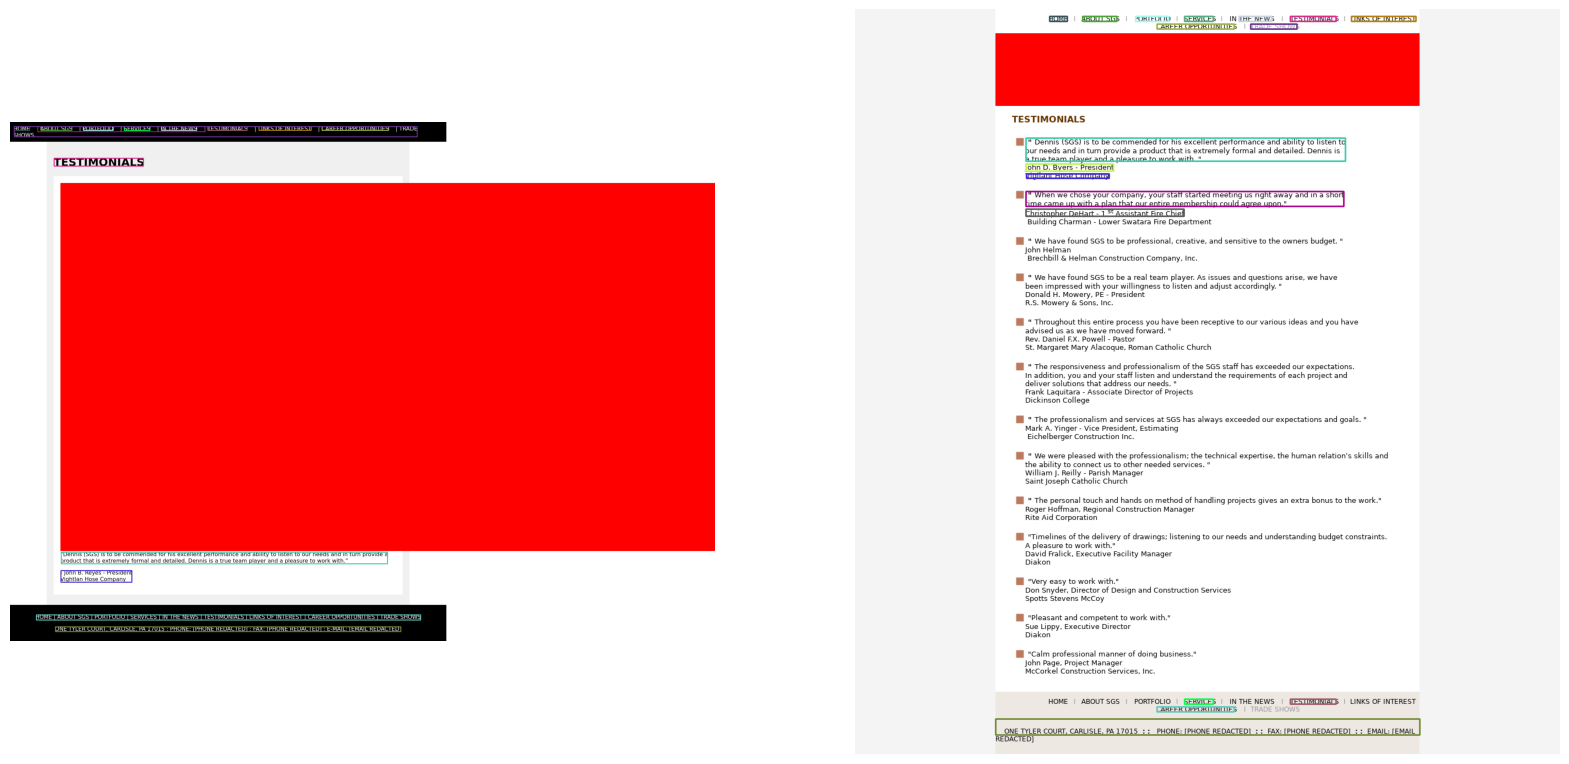

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 10/12 [01:46<00:21, 10.65s/it]

4272.html 23 0.018735875346637253


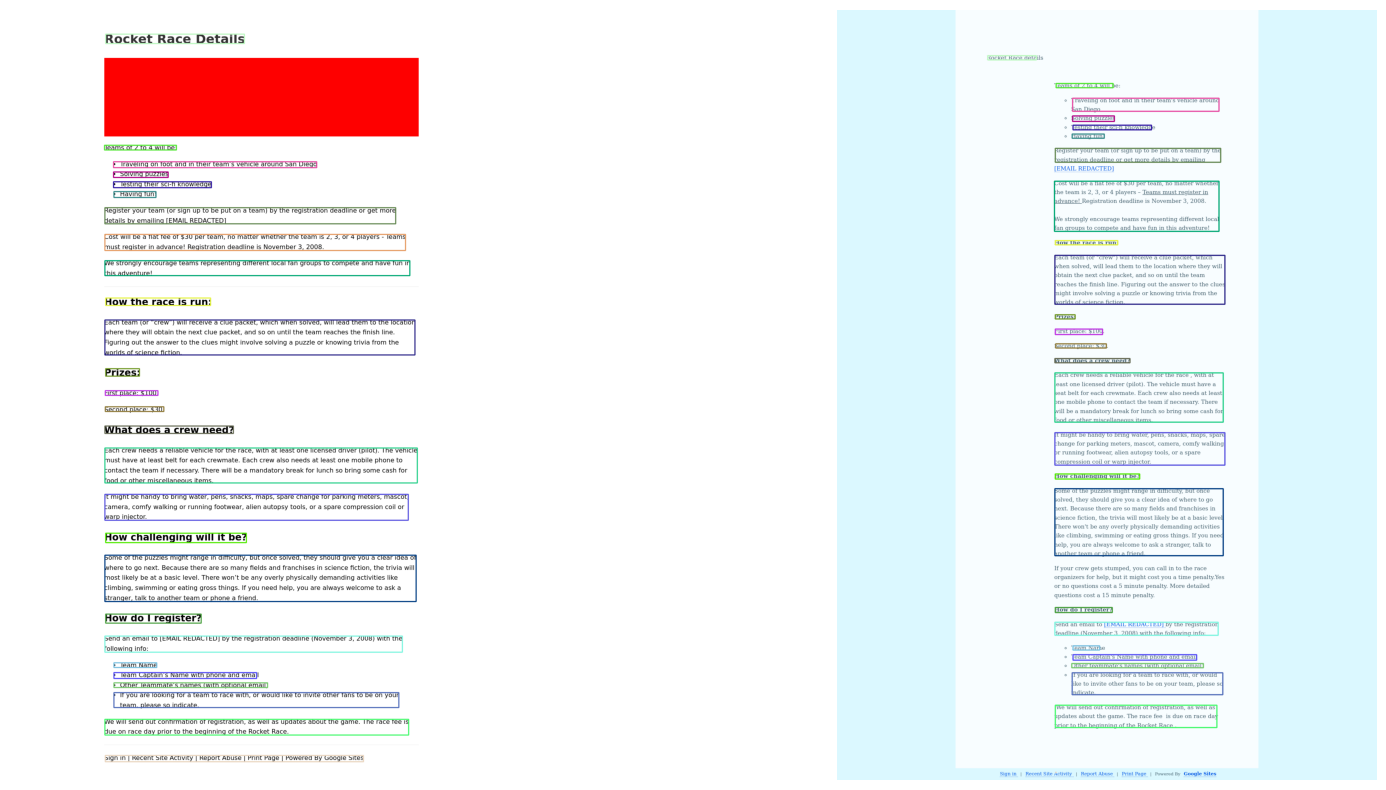

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 11/12 [01:57<00:10, 10.77s/it]

2932.html 27 0.35752760053963967


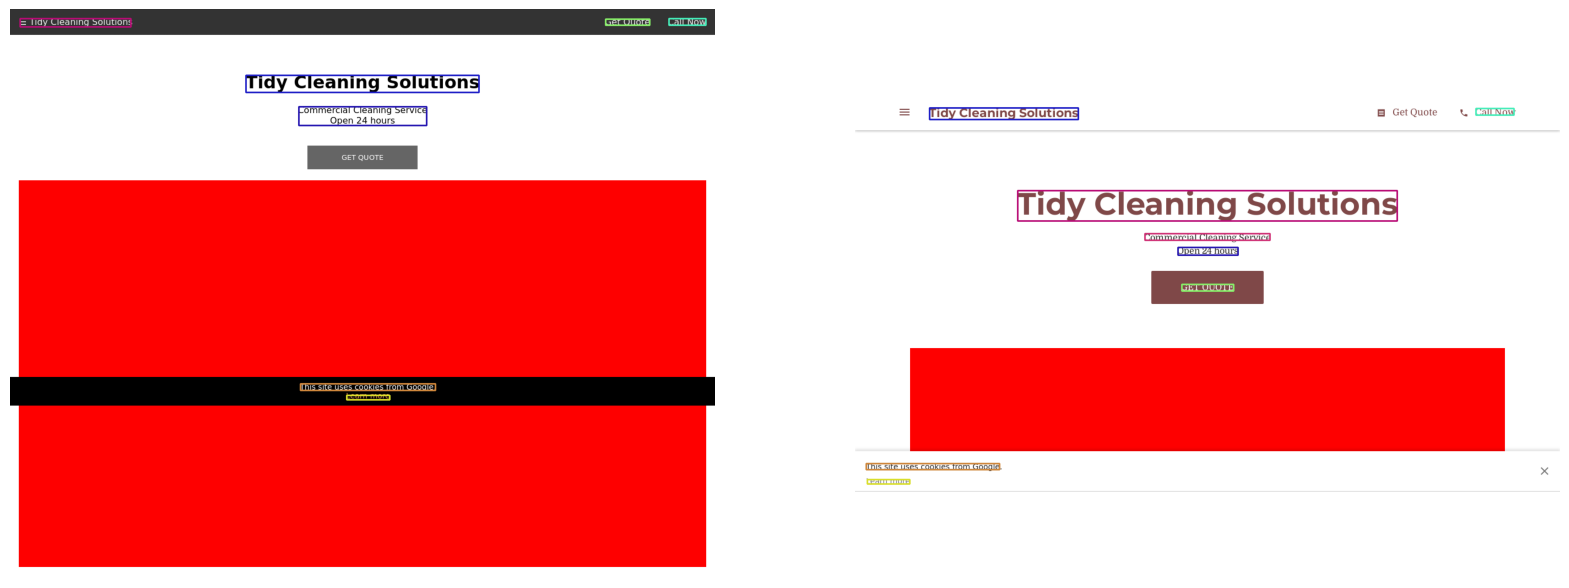

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [02:04<00:00, 10.39s/it]

5672.html 8 0.2208647085073714


avg score:  0.29027958069699755


In [2]:
reference_dir = "../../testset_100"
predictions_dir = "../../predictions_100/gpt4v"
all_scores = 0
counter = 0
for filename in tqdm([item for item in os.listdir(predictions_dir) if item.endswith(".html")]):
    matched, final_score = visual_eval(os.path.join(predictions_dir, filename.replace(".html", ".png")), os.path.join(reference_dir, filename.replace(".html", ".png")), debug=True)
    print(filename, matched, final_score)
    all_scores += final_score
    counter += 1
    
print ("\n")
print ("avg score: ", all_scores / counter)